# 擬似焼きなまし法（シミュレーティド・アニーリング）

動作の初期は温度が高く、解の動きは激しく、或る確率で改悪の方向にも動く。これにより、局所解からの脱出が可能となるが、同時にせっかく最適解になっても、そこから飛び出して（変化して）しまう事もある。
しかし、次第に温度は下がり、動きが乏しくなると、最適解から出てしまう事もなくなり、解が最適解に留まる事が期待出来る。
直感的にも、最初に大きく揺らして徐々に小さくすると、一番低い所にボール等が集まる事が感じられる。実際、様々な実験によっても、最適解の得られる確率が高まる事が明らかになっている。
http://www.cis.twcu.ac.jp/~asakawa/chiba2002/lect6-boltzmann/boltzmann.html

Epoch 1: RMSE = 0.273843017663; ||W||:    1.5; Sum Update: 0.236356
Epoch 2: RMSE = 0.273444883048; ||W||:    1.6; Sum Update: 0.208863
Epoch 3: RMSE = 0.27297547689; ||W||:    1.7; Sum Update: 0.170891
Epoch 4: RMSE = 0.272654254744; ||W||:    1.8; Sum Update: 0.138978
Epoch 5: RMSE = 0.272442829352; ||W||:    1.9; Sum Update: 0.112923
Epoch 6: RMSE = 0.272304438139; ||W||:    2.0; Sum Update: 0.091717
Epoch 7: RMSE = 0.272214088074; ||W||:    2.1; Sum Update: 0.074478
Epoch 8: RMSE = 0.272155244657; ||W||:    2.1; Sum Update: 0.060477
Epoch 9: RMSE = 0.272117020146; ||W||:    2.2; Sum Update: 0.049117
Epoch 10: RMSE = 0.272092262318; ||W||:    2.2; Sum Update: 0.039908
Epoch 11: RMSE = 0.272076282102; ||W||:    2.3; Sum Update: 0.032461
Epoch 12: RMSE = 0.272066010776; ||W||:    2.3; Sum Update: 0.026429
Epoch 13: RMSE = 0.272059443455; ||W||:    2.4; Sum Update: 0.021560
Epoch 14: RMSE = 0.272055272516; ||W||:    2.4; Sum Update: 0.017627
Epoch 15: RMSE = 0.272052646643; ||W||:    2

Epoch 556: RMSE = 0.272013659487; ||W||:   10.3; Sum Update: 0.025842
Epoch 557: RMSE = 0.272013034099; ||W||:   10.4; Sum Update: 0.025945
Epoch 558: RMSE = 0.272012397499; ||W||:   10.4; Sum Update: 0.026048
Epoch 559: RMSE = 0.272011749483; ||W||:   10.5; Sum Update: 0.026152
Epoch 560: RMSE = 0.272011089846; ||W||:   10.5; Sum Update: 0.026256
Epoch 561: RMSE = 0.272010418379; ||W||:   10.5; Sum Update: 0.026361
Epoch 562: RMSE = 0.272009734867; ||W||:   10.6; Sum Update: 0.026466
Epoch 563: RMSE = 0.272009039093; ||W||:   10.6; Sum Update: 0.026571
Epoch 564: RMSE = 0.272008330837; ||W||:   10.6; Sum Update: 0.026677
Epoch 565: RMSE = 0.272007609874; ||W||:   10.7; Sum Update: 0.026783
Epoch 566: RMSE = 0.272006875973; ||W||:   10.7; Sum Update: 0.026890
Epoch 567: RMSE = 0.272006128902; ||W||:   10.8; Sum Update: 0.026997
Epoch 568: RMSE = 0.272005368424; ||W||:   10.8; Sum Update: 0.027104
Epoch 569: RMSE = 0.272004594296; ||W||:   10.8; Sum Update: 0.027212
Epoch 570: RMSE = 0.

Epoch 925: RMSE = 0.258301941875; ||W||:   38.8; Sum Update: 0.078890
Epoch 926: RMSE = 0.258173422375; ||W||:   38.9; Sum Update: 0.078887
Epoch 927: RMSE = 0.258044870226; ||W||:   39.1; Sum Update: 0.078883
Epoch 928: RMSE = 0.257916306735; ||W||:   39.2; Sum Update: 0.078876
Epoch 929: RMSE = 0.257787753162; ||W||:   39.3; Sum Update: 0.078867
Epoch 930: RMSE = 0.2576592307; ||W||:   39.4; Sum Update: 0.078859
Epoch 931: RMSE = 0.25753076046; ||W||:   39.5; Sum Update: 0.078851
Epoch 932: RMSE = 0.257402363451; ||W||:   39.6; Sum Update: 0.078842
Epoch 933: RMSE = 0.257274060564; ||W||:   39.8; Sum Update: 0.078830
Epoch 934: RMSE = 0.257145872552; ||W||:   39.9; Sum Update: 0.078817
Epoch 935: RMSE = 0.257017820018; ||W||:   40.0; Sum Update: 0.078801
Epoch 936: RMSE = 0.256889923391; ||W||:   40.1; Sum Update: 0.078783
Epoch 937: RMSE = 0.256762202915; ||W||:   40.2; Sum Update: 0.078763
Epoch 938: RMSE = 0.256634678627; ||W||:   40.3; Sum Update: 0.078741
Epoch 939: RMSE = 0.256

/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:77: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


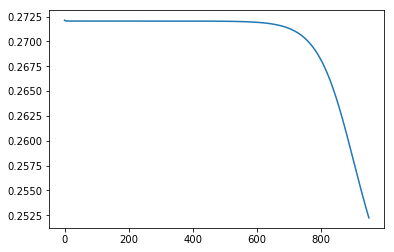

In [2]:
#https://github.com/ramarlina/RBM/blob/master/rbm.py
#http://qiita.com/yutaitatsu/items/a9478841357b10789514
#http://www.sist.ac.jp/~kanakubo/research/neuro/boltzmannmachine.html

import numpy 
from scipy import sparse as S
from matplotlib import pyplot as plt 
from scipy.sparse.csr import csr_matrix 
import pandas 

def normalize(x):
    V = x.copy()
    V -= x.min(axis=1).reshape(x.shape[0],1)
    V /= V.max(axis=1).reshape(x.shape[0],1)
    return V
    
def sigmoid(x):
    #return x*(x > 0)
    #return numpy.tanh(x)
    return 1.0/(1+numpy.exp(-x)) 

class RBM():
    def __init__(self, n_visible=None, n_hidden=None, W=None, learning_rate = 0.1, weight_decay=1,cd_steps=1,momentum=0.5):
        if W == None:
            self.W =  numpy.random.uniform(-.1,0.1,(n_visible,  n_hidden)) / numpy.sqrt(n_visible + n_hidden)
            self.W = numpy.insert(self.W, 0, 0, axis = 1)
            self.W = numpy.insert(self.W, 0, 0, axis = 0)
        else:
            self.W=W 
        self.learning_rate = learning_rate 
        self.momentum = momentum
        self.last_change = 0
        self.last_update = 0
        self.cd_steps = cd_steps
        self.epoch = 0 
        self.weight_decay = weight_decay  
        self.Errors = []
         
            
    def fit(self, Input, max_epochs = 1, batch_size=100):  
        if isinstance(Input, S.csr_matrix):
            bias = S.csr_matrix(numpy.ones((Input.shape[0], 1))) 
            csr = S.hstack([bias, Input]).tocsr()
        else:
            csr = numpy.insert(Input, 0, 1, 1)
        for epoch in range(max_epochs): 
            idx = numpy.arange(csr.shape[0])
            numpy.random.shuffle(idx)
            idx = idx[:batch_size]  
                   
            self.V_state = csr[idx] 
            self.H_state = self.activate(self.V_state)
            pos_associations = self.V_state.T.dot(self.H_state) 
  
            for i in range(self.cd_steps):
              self.V_state = self.sample(self.H_state)  
              self.H_state = self.activate(self.V_state)
              
            neg_associations = self.V_state.T.dot(self.H_state) 
            self.V_state = self.sample(self.H_state) 
            
            # Update weights. 
            w_update = self.learning_rate * ((pos_associations - neg_associations) / batch_size) 
            total_change = numpy.sum(numpy.abs(w_update)) 
            self.W += self.momentum * self.last_change  + w_update
            self.W *= self.weight_decay 
            
            self.last_change = w_update
            
            RMSE = numpy.mean((csr[idx] - self.V_state)**2)**0.5
            self.Errors.append(RMSE)
            self.epoch += 1
            print("Epoch %s: RMSE = %s; ||W||: %6.1f; Sum Update: %f" % (self.epoch, RMSE, numpy.sum(numpy.abs(self.W)), total_change) )
        return self 
        
    def learning_curve(self):
        plt.ion()
        #plt.figure()
        plt.show()
        E = numpy.array(self.Errors)
        plt.plot(pandas.rolling_mean(E, 50)[50:])  
     
    def activate(self, X):
        if X.shape[1] != self.W.shape[0]:
            if isinstance(X, S.csr_matrix):
                bias = S.csr_matrix(numpy.ones((X.shape[0], 1))) 
                csr = S.hstack([bias, X]).tocsr()
            else:
                csr = numpy.insert(X, 0, 1, 1) 
        else:
            csr = X
        p = sigmoid(csr.dot(self.W)) 
        p[:,0]  = 1.0 
        return p  
        
    def sample(self, H, addBias=True): 
        if H.shape[1] == self.W.shape[0]:
            if isinstance(H, S.csr_matrix):
                bias = S.csr_matrix(numpy.ones((H.shape[0], 1))) 
                csr = S.hstack([bias, H]).tocsr()
            else:
                csr = numpy.insert(H, 0, 1, 1)
        else:
            csr = H
        p = sigmoid(csr.dot(self.W.T)) 
        p[:,0] = 1
        return p
      
if __name__=="__main__":
    data = numpy.random.uniform(0,1,(100,10))
    rbm = RBM(10,15)
    rbm.fit(data,1000)
    rbm.learning_curve()